### MARKETING ANALYTICS FOR E-COMMERCE MARKET COMPANY

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [3]:
cust = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\case study 4. Python Foundation End to End Case Study_E-Commerce Analytics Project\CUSTOMERS.csv")
geo_loc = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\case study 4. Python Foundation End to End Case Study_E-Commerce Analytics Project\GEO_LOCATION.csv")
order_items = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\case study 4. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_ITEMS.csv")
order_payment = pd.read_csv (r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\case study 4. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_PAYMENTS.csv")
order_review =pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\case study 4. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_REVIEW_RATINGS.csv")
orders =pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\case study 4. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDERS.csv")
products = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\case study 4. Python Foundation End to End Case Study_E-Commerce Analytics Project\PRODUCTS.csv")
sellers = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\case study 4. Python Foundation End to End Case Study_E-Commerce Analytics Project\SELLERS.csv")

##### Merging datasets

In [4]:
data = pd.merge(orders, order_items, on = 'order_id')

In [5]:
data = pd.merge(data, order_payment, on = 'order_id')

In [6]:
data = pd.merge (data, order_review, on = 'order_id')

In [7]:
data = pd.merge(data, sellers, on = 'seller_id', how = 'left')

In [8]:
data = pd.merge(data, products, on = 'product_id', how  = 'left')

In [9]:
data = pd.merge(data, cust, on = 'customer_id', how = 'left')

In [10]:
data = pd.merge(data, geo_loc, left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix', how = 'left')

In [11]:
data.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,...,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,3149.0,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,...,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,3149.0,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh


In [13]:
geo_loc.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh


In [14]:
data.nunique()

order_id                         98665
customer_id                      98665
order_status                         7
order_purchase_timestamp         88156
order_approved_at                50225
order_delivered_carrier_date     61542
order_delivered_customer_date    75648
order_estimated_delivery_date      449
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              54614
price                             5968
freight_value                     6999
payment_sequential                  29
payment_type                         4
payment_installments                24
payment_value                    28938
review_id                        98452
review_score                         5
review_creation_date               633
review_answer_timestamp          88878
seller_zip_code_prefix            2225
seller_city                        534
seller_state                        19
product_category_name    

In [15]:
##### Checking for Null values

In [16]:
data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
seller_zip_code_prefix              0
seller_city                      1651
seller_state                     1651
product_category_name            1734
product_name

In [17]:
##### dropping columns

data.drop(columns = ['product_name_lenght', 'product_description_lenght','product_photos_qty'], inplace = True)

In [18]:
# checking duplicates

data.duplicated().sum()

0

In [19]:
# checking data types
data.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
review_id                         object
review_score                       int64
review_creation_date              object
review_answer_timestamp           object
seller_zip_code_prefix             int64
seller_city                       object
seller_state    

In [20]:
data.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,...,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,3149.0,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,...,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,3149.0,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh


In [21]:
# changing few columns to date and time

data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format = '%m/%d/%Y %H:%M')
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'], format = '%m/%d/%Y %H:%M')
data['order_delivered_customer_date'] = pd.to_datetime (data['order_delivered_customer_date'], format = '%m/%d/%Y %H:%M')

### 1. Perform Detailed exploratory analysis

##### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations and Total channels, Total payment methods)

In [22]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [23]:
print ('Total Revenue = ', data.payment_value.sum())
print ('Total Quantity = ', data.order_item_id.count())
print ('Total Products = ', data.product_id.nunique())
print ('Total categories = ', data.product_category_name.nunique())
print ('Total Sellers = ', data.seller_id.nunique())
print ('Total locations = ', data.customer_zip_code_prefix.nunique())
print ('Total channels = ', data.payment_type.nunique())

Total Revenue =  20418288.15
Total Quantity =  118315
Total Products =  32951
Total categories =  71
Total Sellers =  3095
Total locations =  14976
Total channels =  4


##### b. Understanding how many new customers acquired every month

In [25]:
# creating a new column combining year and month

data['year_month'] = data['order_purchase_timestamp'].apply(lambda x : pd.Timestamp.strftime(x, format = '%Y%m'))

In [26]:
# calculating new customer per month

new_cust = data.drop_duplicates(subset = 'customer_id',keep = 'first').groupby(by = 'year_month')['customer_id'].nunique().reset_index()
new_cust

,year_month,customer_id
0,201609,2
1,201610,308
2,201612,1
3,201701,789
4,201702,1733
5,201703,2641
6,201704,2391
7,201705,3660
8,201706,3217
9,201707,3969


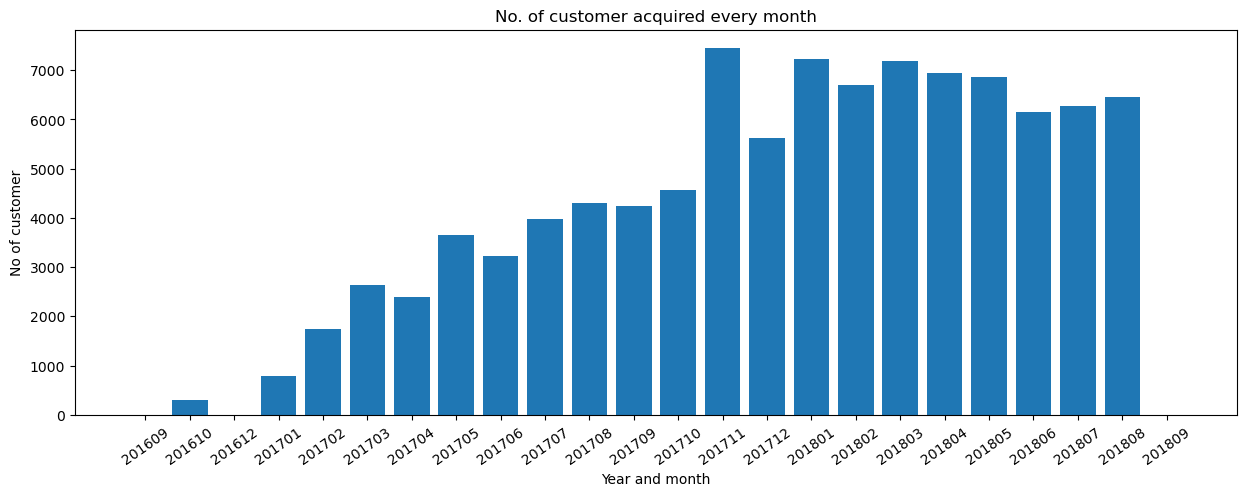

In [27]:
plt.figure(figsize = (15,5))
plt.bar(x = new_cust['year_month'], height = new_cust['customer_id'])
plt.title('No. of customer acquired every month')
plt.xlabel ('Year and month')
plt.ylabel ('No of customer')
plt.xticks (rotation = 35)
plt.show()

##### c.  Understand the retention of customers on month on month basis

In [139]:
# each unique customers
new_cust.head()

,year_month,customer_id
0,201609,2
1,201610,308
2,201612,1
3,201701,789
4,201702,1733


In [140]:
# total customers
cust_total = data.groupby(by = 'year_month')['customer_id'].count().reset_index()
cust_total

,year_month,customer_id
0,201609,3
1,201610,386
2,201612,1
3,201701,1023
4,201702,2073
5,201703,3201
6,201704,2864
7,201705,4445
8,201706,3822
9,201707,4887


In [142]:
cust_retention = pd.merge(cust_total, new_cust, on = 'year_month')
cust_retention.head()

,year_month,customer_id_x,customer_id_y
0,201609,3,2
1,201610,386,308
2,201612,1,1
3,201701,1023,789
4,201702,2073,1733


In [143]:
cust_retention['retention_no'] = cust_retention['customer_id_x'] - cust_retention['customer_id_y']
cust_retention

,year_month,customer_id_x,customer_id_y,retention_no
0,201609,3,2,1
1,201610,386,308,78
2,201612,1,1,0
3,201701,1023,789,234
4,201702,2073,1733,340
5,201703,3201,2641,560
6,201704,2864,2391,473
7,201705,4445,3660,785
8,201706,3822,3217,605
9,201707,4887,3969,918


##### d. How the revenues from existing/new customers on month on month basis

In [144]:
rev_mon = data.groupby(by= 'year_month')['payment_value'].sum().reset_index()
rev_mon

,year_month,payment_value
0,201609,347.52
1,201610,74773.54
2,201612,19.62
3,201701,189570.02
4,201702,346280.99
5,201703,529993.27
6,201704,506900.50
7,201705,730912.77
8,201706,605639.30
9,201707,741936.39


##### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…**

In [29]:
# total sales by year and week 

data['yearweek'] = data['order_purchase_timestamp'].apply(lambda x : pd.Timestamp.strftime(x, format = '%Y-%V'))
Sales = data.groupby(by = 'yearweek')['payment_value'].sum().reset_index()
Sales

,yearweek,payment_value
0,2016-35,272.46
1,2016-36,75.06
2,2016-39,109.34
3,2016-40,69318.67
4,2016-41,5345.53
...,...,...
89,2018-32,439154.03
90,2018-33,332190.33
91,2018-34,171726.50
92,2018-35,15996.14


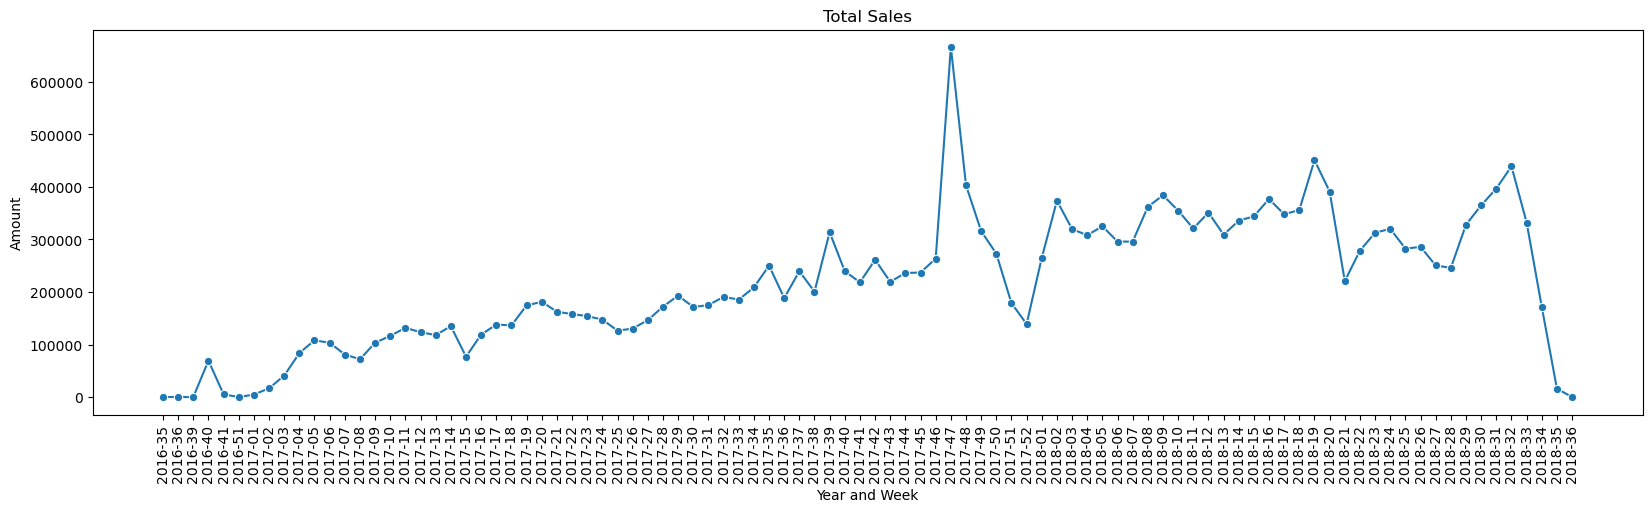

In [30]:
plt.figure(figsize=(20,5))
sns.lineplot(data = Sales, x = 'yearweek', y = 'payment_value', marker = 'o')
plt.title ('Total Sales')
plt.xlabel('Year and Week')
plt.ylabel('Amount')
plt.xticks(rotation = 90)
plt.show()

In [31]:
# sales quantity by category

Qty_categ = data.groupby(by = 'product_category_name')['order_id'].count().reset_index()
Qty_categ

,product_category_name,order_id
0,Agro_Industry_And_Commerce,252
1,Air_Conditioning,302
2,Art,219
3,Arts_And_Craftmanship,24
4,Audio,381
...,...,...
66,Stationery,2625
67,Tablets_Printing_Image,87
68,Telephony,4726
69,Toys,4281


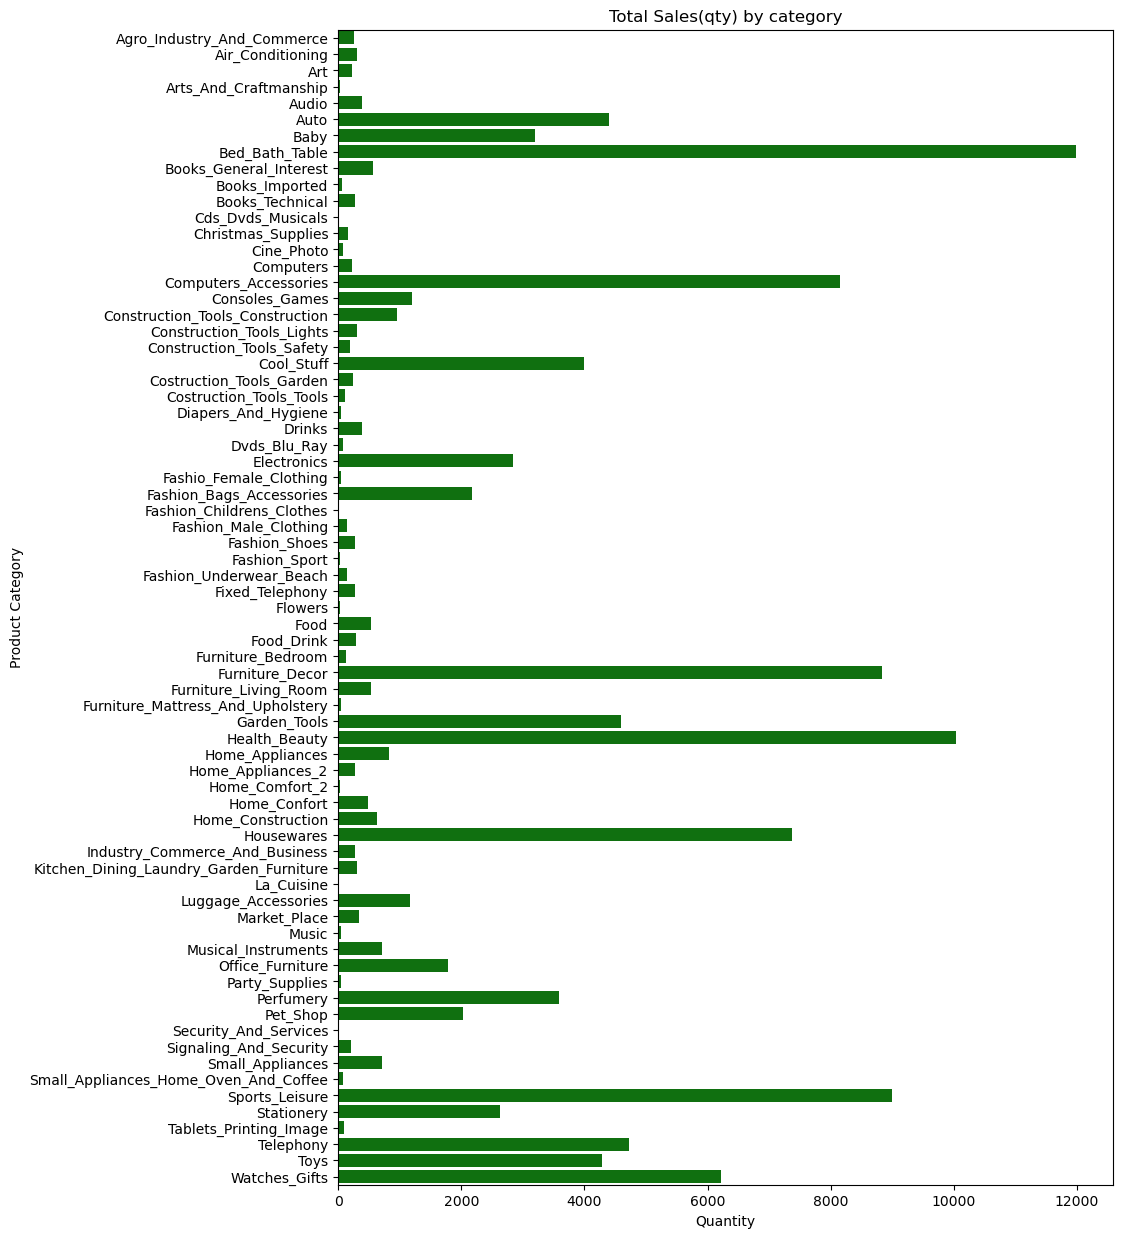

In [32]:
plt.figure(figsize = (10,15))
sns.barplot (data = Qty_categ, y = 'product_category_name', x = 'order_id', color = 'green')
plt.title ('Total Sales(qty) by category')
plt.xlabel ('Quantity')
plt.ylabel ('Product Category')
plt.show()

In [33]:
# sales by location

Qty_loc = data.groupby(by = 'customer_state')['order_id'].count().reset_index()
Qty_loc

,customer_state,order_id
0,Andhra Pradesh,72803
1,Arunachal Pradesh,1320
2,Chhattisgarh,7423
3,Delhi,3931
4,Goa,10
5,Gujarat,8890
6,Haryana,2631
7,Himachal Pradesh,862
8,Jammu & Kashmir,1832
9,Karnataka,4563


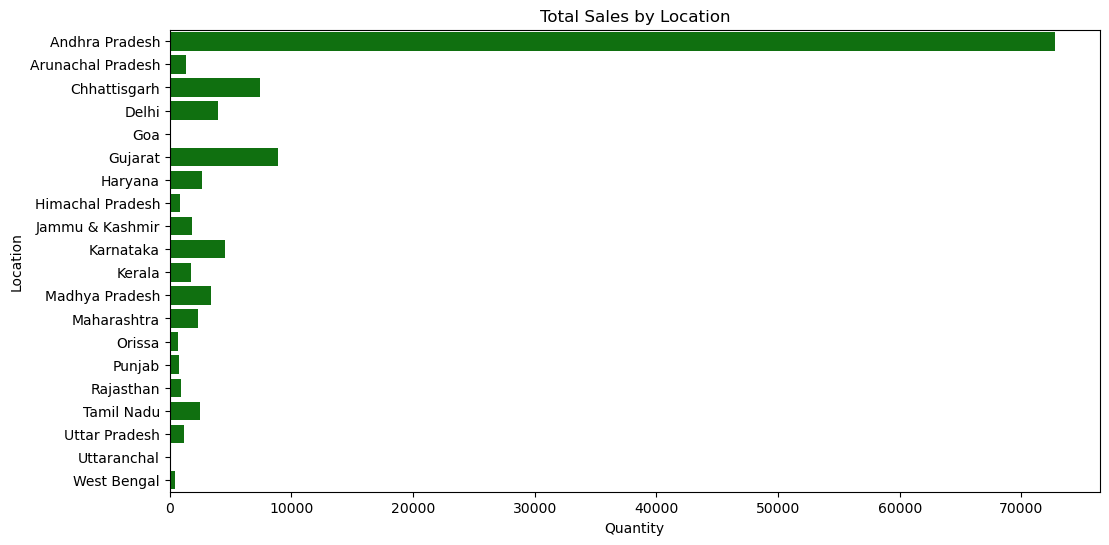

In [34]:
plt.figure(figsize = (12,6))
sns.barplot (data = Qty_loc , x = 'order_id', y = 'customer_state', color = 'green')
plt.title ('Total Sales by Location')
plt.xlabel ('Quantity')
plt.ylabel ('Location')
plt.show()

In [35]:
# Sales by month

data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'year_month', 'yearweek'],
      dtype='object')

In [36]:
Qty_month = data.groupby(by = 'year_month')['order_id'].count().reset_index()
Qty_month

,year_month,order_id
0,201609,3
1,201610,386
2,201612,1
3,201701,1023
4,201702,2073
5,201703,3201
6,201704,2864
7,201705,4445
8,201706,3822
9,201707,4887


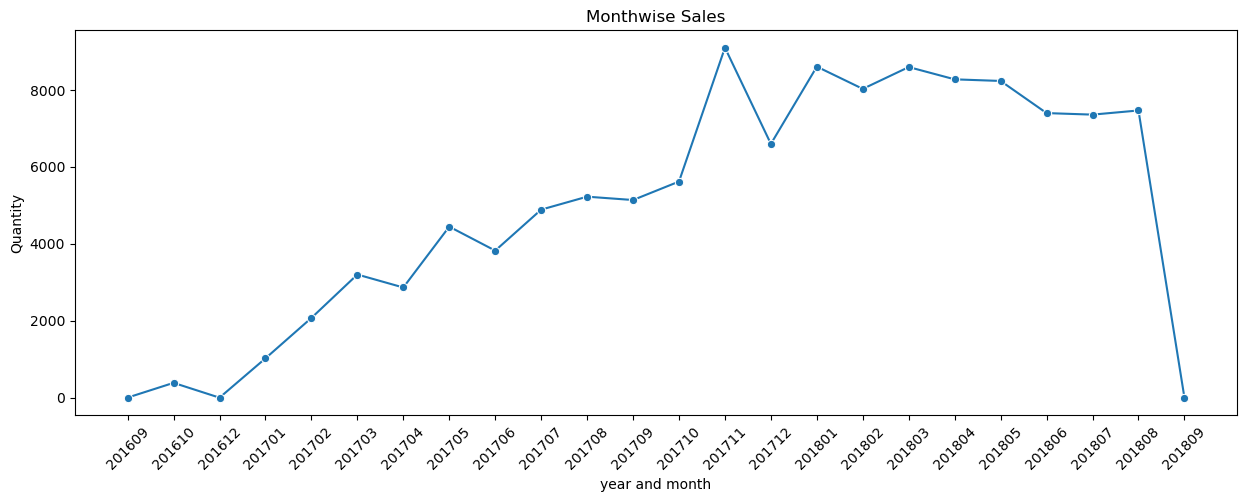

In [37]:
plt.figure(figsize = (15,5))
sns.lineplot (data = Qty_month, x= 'year_month', y = 'order_id', marker = 'o')
plt.title ('Monthwise Sales')
plt.xlabel ('year and month')
plt.ylabel ('Quantity')
plt.xticks (rotation = 45)
plt.show()

In [38]:
# Sales by week

Qty_week = data.groupby(by = 'yearweek')['order_id'].count().reset_index()
Qty_week

,yearweek,order_id
0,2016-35,2
1,2016-36,1
2,2016-39,1
3,2016-40,338
4,2016-41,47
...,...,...
89,2018-32,2323
90,2018-33,2125
91,2018-34,1213
92,2018-35,136


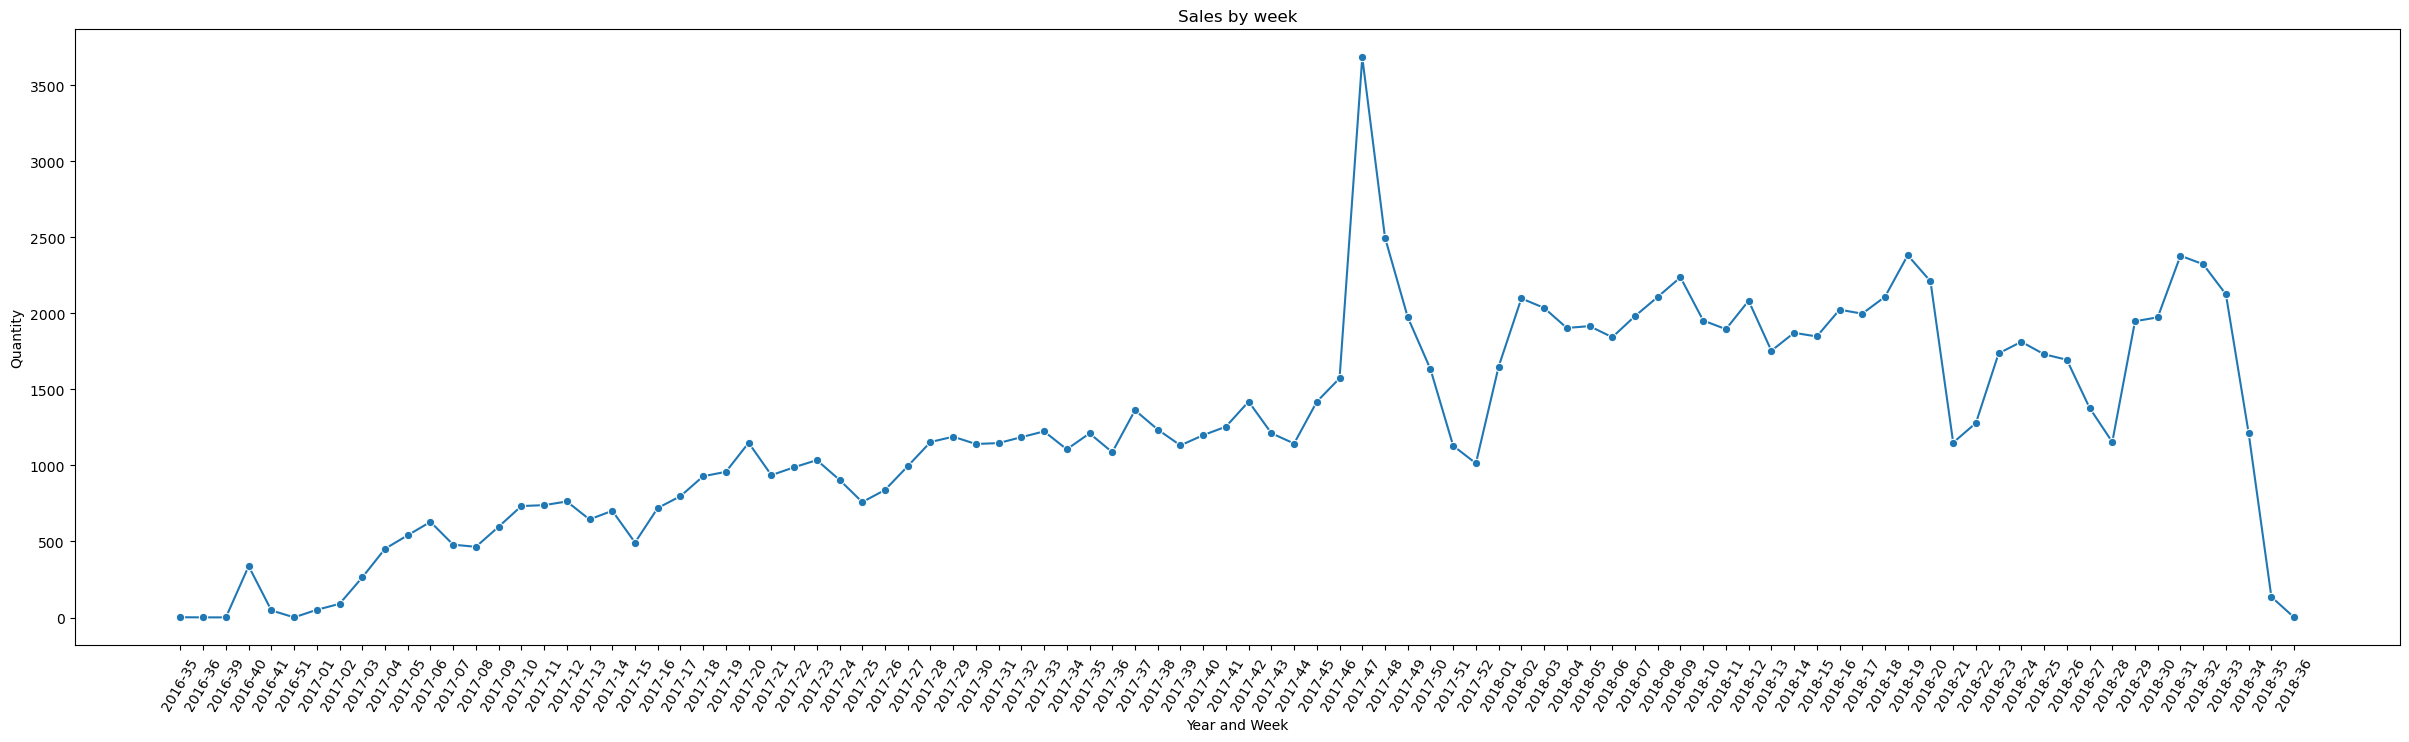

In [39]:
plt.figure(figsize = (30,8))
sns.lineplot(data = Qty_week, x = 'yearweek', y = 'order_id', marker = 'o')
plt.title('Sales by week')
plt.xlabel ('Year and Week')
plt.ylabel ('Quantity')
plt.xticks (rotation = 60)
plt.show()

In [40]:
# sales by day (Quantity)

data['year_day'] = data['order_purchase_timestamp'].apply(lambda x : pd.Timestamp.strftime (x,'%Y-%d'))

In [41]:
Qty_day = data.groupby(by = 'year_day')['order_id'].count().reset_index()
Qty_day

,year_day,order_id
0,2016-02,1
1,2016-03,8
2,2016-04,78
3,2016-05,61
4,2016-06,58
...,...,...
67,2018-27,1846
68,2018-28,1734
69,2018-29,1351
70,2018-30,1432


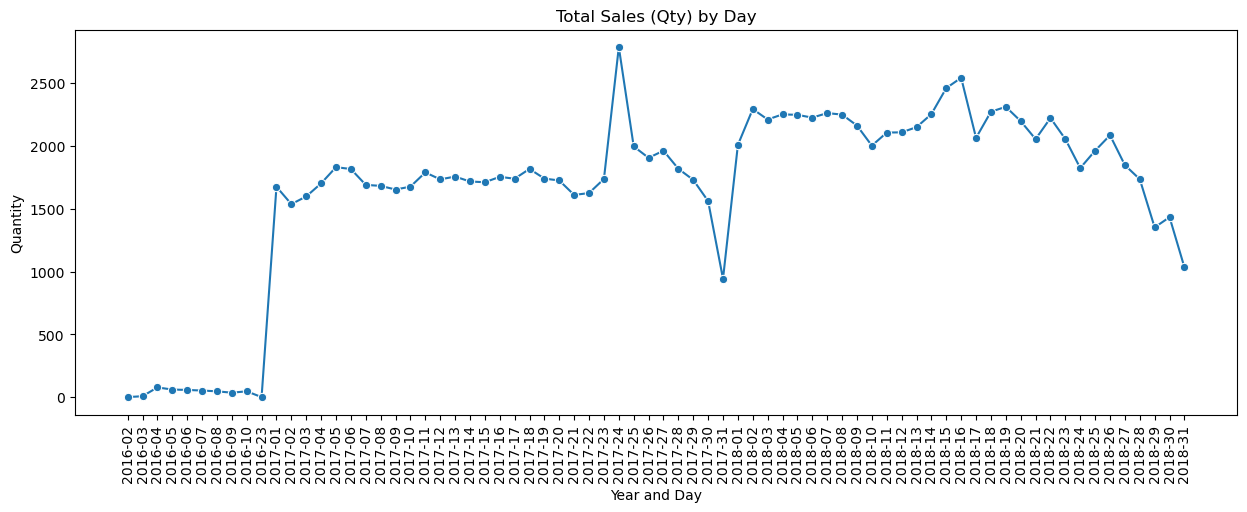

In [42]:
plt.figure(figsize = (15, 5))
sns.lineplot(data = Qty_day, x = 'year_day' , y = 'order_id', marker = 'o')
plt.title('Total Sales (Qty) by Day')
plt.xlabel ('Year and Day')
plt.ylabel ('Quantity')
plt.xticks (rotation = 90)
plt.show()

In [43]:
# Amount of sale by Day

Amt_day = data.groupby (by = 'year_day')['payment_value'].sum().reset_index()
Amt_day

,year_day,payment_value
0,2016-02,109.34
1,2016-03,595.14
2,2016-04,13728.60
3,2016-05,15828.35
4,2016-06,11312.51
...,...,...
67,2018-27,331966.88
68,2018-28,309583.30
69,2018-29,225945.73
70,2018-30,250754.53


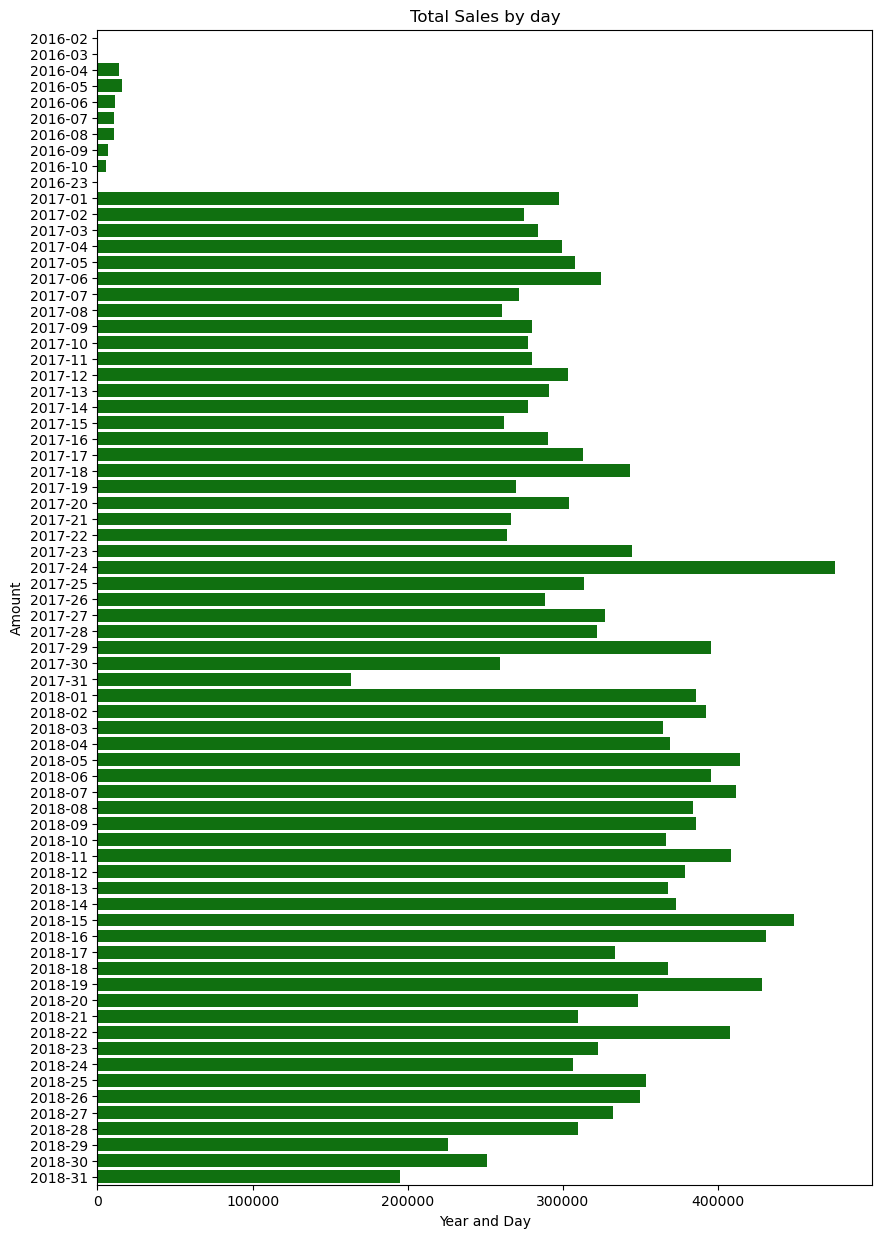

In [44]:
plt.figure(figsize = (10,15))
sns.barplot(data = Amt_day, y = 'year_day', x = 'payment_value', color = 'green')
plt.title ('Total Sales by day')
plt.xlabel('Year and Day')
plt.ylabel ('Amount')
plt.show()

In [46]:
# Sales by payment type

Qty_pay = data.groupby(by = 'payment_type')['order_id'].count().reset_index()
Qty_pay

,payment_type,order_id
0,UPI,23018
1,credit_card,87266
2,debit_card,1699
3,voucher,6332


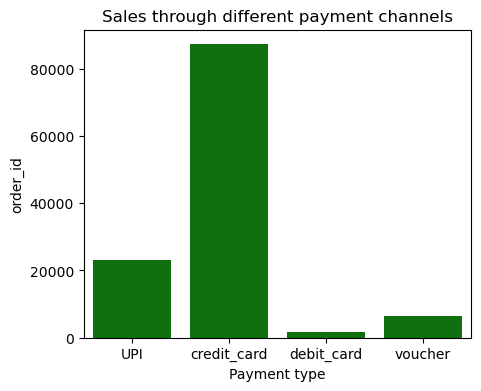

In [47]:
plt.figure(figsize = (5,4))
sns.barplot(data = Qty_pay, x = 'payment_type', y = 'order_id', color = 'green')
plt.title ('Sales through different payment channels')
plt.xlabel ('Payment type')
plt.ylabel ('order_id')
plt.show()

##### f. Popular Products by month, seller, state, category.

In [48]:
# by month

pop_prod = data[['year_month','product_category_name','order_id']].groupby(['year_month', 'product_category_name']).aggregate('count').reset_index()

In [49]:
pop_prod

,year_month,product_category_name,order_id
0,201609,Furniture_Decor,2
1,201609,Telephony,1
2,201610,Air_Conditioning,10
3,201610,Audio,2
4,201610,Auto,12
...,...,...,...
1247,201808,Stationery,172
1248,201808,Telephony,289
1249,201808,Toys,170
1250,201808,Watches_Gifts,428


In [50]:
prod_month = pop_prod.groupby('year_month').apply(lambda x: x.nlargest(1, 'order_id')).reset_index(drop = True)

In [51]:
prod_month

,year_month,product_category_name,order_id
0,201609,Furniture_Decor,2
1,201610,Furniture_Decor,80
2,201612,Fashion_Bags_Accessories,1
3,201701,Furniture_Decor,207
4,201702,Furniture_Decor,283
5,201703,Furniture_Decor,347
6,201704,Bed_Bath_Table,313
7,201705,Bed_Bath_Table,430
8,201706,Bed_Bath_Table,435
9,201707,Bed_Bath_Table,641


In [52]:
# by seller (considered product ID and seller ID)
prod_seller = data[['seller_id','product_id','order_id']].groupby(['seller_id', 'product_id']).aggregate('count').reset_index()

In [53]:
prod_seller = prod_seller.groupby('seller_id').apply(lambda x: x.nlargest(1, 'order_id')).reset_index(drop = True)

In [54]:
prod_seller

,seller_id,product_id,order_id
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,115
2,001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,1
3,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,17
4,003554e2dce176b5555353e4f3555ac8,67f36b3689147d882d2b298fd0715d80,1
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,cea898bfbca0b5b0e7b36cecd350709e,1
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,ada800a927673ac73cdfbbd2c832331b,5
3092,ffeee66ac5d5a62fe688b9d26f83f534,1347d4320dcd0acd750e37bb3d94a918,10
3093,fffd5413c0700ac820c7069d66d98c89,ebb12274522d82caa7dca657873b2ad7,6


In [57]:
# by state

prod_state = data[['customer_state','product_id','order_id']].groupby(['customer_state', 'product_id']).aggregate('count').reset_index()

In [56]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'year_month', 'yearweek',
       'year_day'],
      dtype='object')

In [58]:
prod_state = prod_state.groupby('customer_state').apply(lambda x: x.nlargest(1, 'order_id')).reset_index(drop = True)

In [59]:
prod_state

,customer_state,product_id,order_id
0,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,346
1,Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff,12
2,Chhattisgarh,422879e10f46682990de24d770e7f83d,42
3,Delhi,53759a2ecddad2bb87a079a1f1519f73,25
4,Goa,2a5806f10d0f00e5ad032dd2e3c8806e,1
5,Gujarat,aca2eb7d00ea1a7b8ebd4e68314663af,52
6,Haryana,35afc973633aaeb6b877ff57b2793310,17
7,Himachal Pradesh,422879e10f46682990de24d770e7f83d,6
8,Jammu & Kashmir,89b190a046022486c635022524a974a8,15
9,Karnataka,422879e10f46682990de24d770e7f83d,25


In [60]:
# by category

prod_categ = data[['product_category_name','product_id','order_id']].groupby(['product_category_name', 'product_id']).aggregate('count').reset_index()
prod_categ = prod_categ.groupby('product_category_name').apply(lambda x: x.nlargest(1, 'order_id')).reset_index(drop = True)

In [61]:
prod_categ

,product_category_name,product_id,order_id
0,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,44
1,Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb,17
2,Art,4fe644d766c7566dbc46fb851363cb3b,109
3,Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475,5
4,Audio,db5efde3ad0cc579b130d71c4b2db522,50
...,...,...,...
66,Stationery,fb55982be901439613a95940feefd9ee,85
67,Tablets_Printing_Image,6bbe55cf8f85c87b6eebb775a53402f4,35
68,Telephony,e7cc48a9daff5436f63d3aad9426f28b,100
69,Toys,880be32f4db1d9f6e2bec38fb6ac23ab,106


##### g. Popular categories by state, month

In [68]:
# by state
cat_state = data[['product_category_name', 'customer_state', 'order_id']].groupby(['product_category_name', 'customer_state']).aggregate('count').reset_index()

In [70]:
cat_state = cat_state.sort_values(['customer_state','order_id'], ascending = [True, False]).drop_duplicates ('customer_state')

In [71]:
cat_state

,product_category_name,customer_state,order_id
108,Bed_Bath_Table,Andhra Pradesh,7736
109,Bed_Bath_Table,Arunachal Pradesh,128
110,Bed_Bath_Table,Chhattisgarh,733
635,Health_Beauty,Delhi,334
73,Auto,Goa,1
112,Bed_Bath_Table,Gujarat,808
113,Bed_Bath_Table,Haryana,296
114,Bed_Bath_Table,Himachal Pradesh,85
115,Bed_Bath_Table,Jammu & Kashmir,185
116,Bed_Bath_Table,Karnataka,412


In [72]:
# by month
cat_month = data[['product_category_name', 'year_month', 'order_id']].groupby(['product_category_name', 'year_month']).aggregate('count').reset_index()

In [74]:
cat_month = cat_month.sort_values(['year_month','order_id'], ascending = [True, False]).drop_duplicates ('year_month')

In [75]:
cat_month

,product_category_name,year_month,order_id
673,Furniture_Decor,201609,2
674,Furniture_Decor,201610,80
482,Fashion_Bags_Accessories,201612,1
675,Furniture_Decor,201701,207
676,Furniture_Decor,201702,283
677,Furniture_Decor,201703,347
130,Bed_Bath_Table,201704,313
131,Bed_Bath_Table,201705,430
132,Bed_Bath_Table,201706,435
133,Bed_Bath_Table,201707,641


##### h. List top 10 most expensive products sorted by price

In [78]:
exp_prod = data.nlargest(10, 'price')

In [84]:
exp_prod = exp_prod[['product_category_name', 'price']].reset_index(drop = True)

In [85]:
exp_prod

,product_category_name,price
0,Housewares,6735.00
1,Computers,6729.00
2,Art,6499.00
3,Small_Appliances,4799.00
4,Small_Appliances,4690.00
5,Computers,4590.00
6,Musical_Instruments,4399.87
7,Consoles_Games,4099.99
8,Sports_Leisure,4059.00
9,Watches_Gifts,3999.90


### 2. Performing Customers/sellers Segmentation

##### a.  Divide the customers into groups based on the revenue generated 

In [86]:
# calcultaing revenue customer wise
customer_revenue = data.groupby('customer_id')['payment_value'].sum().reset_index()

In [87]:
# creating groups
customer_revenue['segment'] = pd.qcut(customer_revenue['payment_value'], q=3, labels=['Low', 'Medium', 'High'])

In [89]:
customer_revenue.groupby(by = 'segment')['payment_value'].sum()

segment
Low        1636463.11
Medium     3699128.91
High      15082696.13
Name: payment_value, dtype: float64

##### b.  Divide the sellers into groups based on the revenue generated

In [91]:
# calcultaing revenue customer wise
seller_revenue = data.groupby('seller_id')['payment_value'].sum().reset_index()

In [92]:
# creating groups
seller_revenue['segment'] = pd.qcut(seller_revenue['payment_value'], q=3, labels=['Low', 'Medium', 'High'])

In [94]:
seller_revenue.groupby(by = 'segment')['payment_value'].sum()

segment
Low         223517.21
Medium     1459054.54
High      18735716.40
Name: payment_value, dtype: float64

### 3. Cross-Selling (Which products are selling together)

##### We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

In [145]:
# creating a variable to save a list of products in a transaction
transactions = data.groupby('order_id')['product_id'].apply(list).tolist()

In [106]:
combination_count = {}

for transaction in transactions:
    for i in range(len(transaction)):
        for j in range(i + 1, len(transaction)):
            
            # Generate a combination of 2 products
            combinations = (transaction[i], transaction[j])
            
            # Check if the combination is already in the dictionary; if not, add it
            if combinations not in combination_count:
                combination_count[combinations] = 1
            else:
                combination_count[combinations] += 1


In [107]:
combination_count

{('368c6c730842d78016ad823897a372db', '368c6c730842d78016ad823897a372db'): 155,
 ('e95ee6822b66ac6058e2e4aff656071a', 'e95ee6822b66ac6058e2e4aff656071a'): 4,
 ('4089861a1bd4685da70bddd6b4f974f1', '4089861a1bd4685da70bddd6b4f974f1'): 1,
 ('0b0172eb0fd18479d29c3bc122c058c2', '0b0172eb0fd18479d29c3bc122c058c2'): 4,
 ('e67307ff0f15ade43fcb6e670be7a74c', 'e67307ff0f15ade43fcb6e670be7a74c'): 9,
 ('2d9ff06c8870a518f5f6909774e140fb', '2d9ff06c8870a518f5f6909774e140fb'): 1,
 ('9eae06d51aaa383b2bed5547a19d581c', '9eae06d51aaa383b2bed5547a19d581c'): 1,
 ('d41dc2f2979f52d75d78714b378d4068', '880be32f4db1d9f6e2bec38fb6ac23ab'): 1,
 ('2b939dc9b176d7fa21594d588815d4a4', '2b939dc9b176d7fa21594d588815d4a4'): 73,
 ('1f9799a175f50c9fa725984775cac5c5', '13944d17b257432717fd260e69853140'): 1,
 ('8a6187b2665118d5095f99a25fd7ba7a', '8a6187b2665118d5095f99a25fd7ba7a'): 1,
 ('99e71b776debf2f01a69dce207e3e4f8', '99e71b776debf2f01a69dce207e3e4f8'): 1,
 ('656e0eca68dcecf6a31b8ececfabe3e8', '656e0eca68dcecf6a31b8e

In [109]:
top_combinations = sorted(combination_count.items(), key=lambda x: x[1], reverse=True)[:10]

In [113]:
top_combinations = pd.DataFrame(top_combinations, columns = ['combination','count'])
top_combinations

,combination,count
0,"(ebf9bc6cd600eadd681384e3116fda85, 5ddab10d5e0...",882
1,"(ebf9bc6cd600eadd681384e3116fda85, ebf9bc6cd60...",862
2,"(0554911df28fda9fd668ce5ba5949695, 0554911df28...",703
3,"(1aecdb5fa3add74e385f25c6c527a462, 1aecdb5fa3a...",406
4,"(422879e10f46682990de24d770e7f83d, 422879e10f4...",326
5,"(8d37ee446981d3790967d0268d6cfc81, 8d37ee44698...",325
6,"(11250b0d4b709fee92441c5f34122aed, 11250b0d4b7...",276
7,"(eea3e07f864a0a1389726d8a5f31c3f6, eea3e07f864...",276
8,"(4e53a453045707bbc5febcf5f32097ac, 4e53a453045...",276
9,"(0449db5eede617c5fd413071d582f038, 0449db5eede...",276


### 4. Payment Behaviour

##### a. How customers are paying?

In [115]:
payment = data.payment_type.value_counts()
payment

credit_card    87266
UPI            23018
voucher         6332
debit_card      1699
Name: payment_type, dtype: int64

##### b. Which payment channels are used by most customers?

In [117]:
pay_chan = data.groupby(by = 'payment_type')['order_id'].count().reset_index()
pay_chan

,payment_type,order_id
0,UPI,23018
1,credit_card,87266
2,debit_card,1699
3,voucher,6332


In [119]:
pay_chan.sort_values(by = 'order_id', ascending = False).head(1)

,payment_type,order_id
1,credit_card,87266


### 5. Customer satisfaction towards category & product

##### a. Which categories (top 10) are maximum rated & minimum rated?

In [125]:
# maximum rated
cat_max = data.groupby(by = 'product_category_name')['review_score'].mean().sort_values(ascending = False).reset_index().head(10)
cat_max

,product_category_name,review_score
0,Cds_Dvds_Musicals,4.642857
1,Fashion_Childrens_Clothes,4.500000
2,Books_General_Interest,4.431858
3,Books_Imported,4.419355
4,Books_Technical,4.345588
5,Costruction_Tools_Tools,4.333333
6,Small_Appliances_Home_Oven_And_Coffee,4.320513
7,Food_Drink,4.312715
8,Luggage_Accessories,4.290628
9,Fashion_Sport,4.258065


In [129]:
# minimum rated
cat_min = data.groupby(by ='product_category_name')['review_score'].mean().sort_values(ascending = True).reset_index().head(10)
cat_min

,product_category_name,review_score
0,Security_And_Services,2.500000
1,Diapers_And_Hygiene,3.256410
2,Home_Comfort_2,3.387097
3,Office_Furniture,3.516779
4,Fashion_Male_Clothing,3.531034
5,Fixed_Telephony,3.661765
6,Fashio_Female_Clothing,3.780000
7,Furniture_Mattress_And_Upholstery,3.804878
8,Audio,3.824147
9,Construction_Tools_Safety,3.834171


##### b. Which products (top10) are maximum rated & minimum rated?

In [131]:
# maximum rated

prod_max = data.groupby(by = 'product_id')['review_score'].mean().sort_values(ascending = False).reset_index().head(10)
prod_max

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,86743ff92eee3d16b7df59cddd583b8c,5.0
2,868ceb027ab706a4dee42e2220006b85,5.0
3,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
4,868766ed2172644fdd977d6bd395a107,5.0
5,8684bd8f93b4f4038d07188a23811e93,5.0
6,867c96d2bb67aba6500a4c509cf76072,5.0
7,867b820367ec206b38a357f2c12454b7,5.0
8,867901d7e8488fb97f1fb538c09d476e,5.0
9,865bfa00c1dad8f4146d3c2765f051ca,5.0


In [132]:
# minimum score

prod_min = data.groupby(by = 'product_id')['review_score'].mean().sort_values().reset_index().head(10)
prod_min

,product_id,review_score
0,592cc6634d2c783d297effc0b828bc37,1.0
1,482c25dc8512547962854dfff5ac057b,1.0
2,e10c5041c0752194622a7a7016d8c9b5,1.0
3,47fafa6908e75ae62b8a36a9eb3b9234,1.0
4,47d85e3e35a3e29f93fdc12b295d520c,1.0
5,47d6209a0b169cc800b0a45a9127d2f2,1.0
6,47cad419b0ad5dc9d2305bf795c3c16f,1.0
7,47b49b876c60eafde72f0e1c602f386d,1.0
8,47b0f8596ee6dafbb4438cac16fa6275,1.0
9,47ac4dcdb04867daeaad647d224389e4,1.0


##### c. Average rating by location, seller, product, category, month etc

In [133]:
# by location

loc_avg = data.groupby(by = 'customer_state')['review_score'].mean().reset_index()
loc_avg

,customer_state,review_score
0,Andhra Pradesh,3.995275
1,Arunachal Pradesh,4.024242
2,Chhattisgarh,4.031524
3,Delhi,4.029000
4,Goa,4.800000
5,Gujarat,4.037570
6,Haryana,4.117066
7,Himachal Pradesh,3.988399
8,Jammu & Kashmir,3.998362
9,Karnataka,4.015122


In [135]:
# by seller
seller_avg = data.groupby(by = 'seller_id')['review_score'].mean().reset_index()
seller_avg

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.883817
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,4.033898
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.000000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.285714
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
3093,fffd5413c0700ac820c7069d66d98c89,3.838710


In [136]:
# by product
prod_avg = data.groupby(by = 'product_id')['review_score'].mean().reset_index()
prod_avg

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,4.5
32947,fff81cc3158d2725c0655ab9ba0f712c,4.0
32948,fff9553ac224cec9d15d49f5a263411f,5.0
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.0


In [137]:
# by category
cat_avg = data.groupby(by= 'product_category_name')['review_score'].mean().reset_index()
cat_avg

,product_category_name,review_score
0,Agro_Industry_And_Commerce,4.150794
1,Air_Conditioning,3.920530
2,Art,3.917808
3,Arts_And_Craftmanship,4.125000
4,Audio,3.824147
...,...,...
66,Stationery,4.176381
67,Tablets_Printing_Image,4.045977
68,Telephony,3.938214
69,Toys,4.142490


In [138]:
# by month
month_avg = data.groupby(by = 'year_month')['review_score'].mean().reset_index()
month_avg

,year_month,review_score
0,201609,1.000000
1,201610,3.585492
2,201612,5.000000
3,201701,4.087977
4,201702,4.041003
5,201703,4.049360
6,201704,3.959497
7,201705,4.117210
8,201706,4.117216
9,201707,4.108042
